In [4]:
from fenics import *
import matplotlib.pyplot as plt

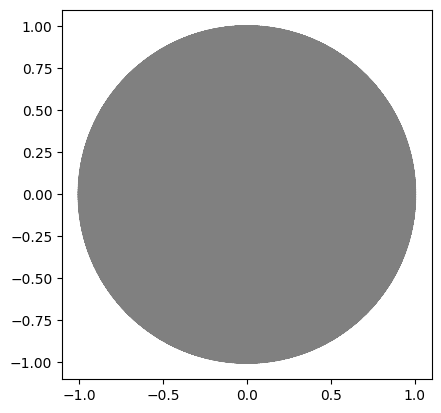

In [6]:
filename = "mesh/meshCircle"
mesh = Mesh(filename + ".xml")
bounds = MeshFunction("size_t", mesh, filename + "_facet_region.xml")
face = MeshFunction("size_t", mesh, filename + "_physical_region.xml")
plot(mesh)

Solving linear variational problem.


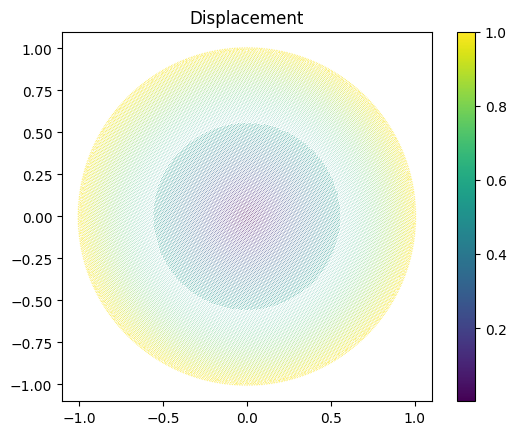

In [7]:
# Scaled variables
E = 21e6
nu = 0.3
mu = E / (2 * (1 + nu))
lambda_ = E * nu / ((1 + nu) * (1 - 2 * nu))

# Create mesh and define function space
V = VectorFunctionSpace(mesh, 'P', 1)

# Define boundary condition
tol = 1E-14

def clamped_boundary(x, on_boundary):
    return on_boundary and x[0] < tol
g = Expression(("x[0]/sqrt(x[0]*x[0]+x[1]*x[1])", "x[1]/sqrt(x[0]*x[0]+x[1]*x[1])"), degree=2)
bc = DirichletBC(V, g, bounds,1)


# Define strain and stress

def epsilon(u):
    return 0.5*(grad(u) + grad(u).T)
    #return sym(nabla_grad(u))

def sigma(u):
    return lambda_*div(u)*Identity(d) + 2*mu*epsilon(u)

# Define variational problem
u = TrialFunction(V)
d = u.geometric_dimension()  # space dimension
v = TestFunction(V)
f = Constant((0, 0))  # body force
T = Constant((0, 0))
a = inner(sigma(u), epsilon(v))*dx
L = dot(f, v)*dx + dot(T, v)*ds

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Plot solution
sol = plot(u, title='Displacement')#, mode='displacement')
plt.colorbar(sol)

# # Plot stress
# s = sigma(u) - (1./3)*tr(sigma(u))*Identity(d)  # deviatoric stress
# von_Mises = sqrt(3./2*inner(s, s))
# V = FunctionSpace(mesh, 'P', 1)
# von_Mises = project(von_Mises, V)
# plot(von_Mises, title='Stress intensity')

# Compute magnitude of displacement
# u_magnitude = sqrt(dot(u, u))
# u_magnitude = project(u_magnitude, V)
# plot(u_magnitude, 'Displacement magnitude')
# print('min/max u:',
#       u_magnitude.vector().min(),
#       u_magnitude.vector().max())

In [19]:
r = []

NameError: name 'x' is not defined

Solving linear variational problem.


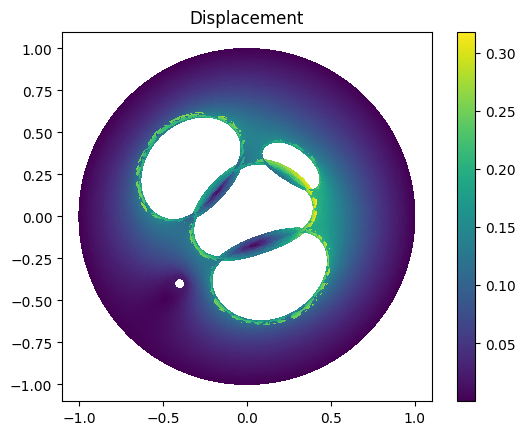

In [26]:

# Create mesh and define function space
filename = "mesh/meshHoles"
mesh_init = Mesh(filename + ".xml")
bounds = MeshFunction("size_t", mesh_init, filename + "_facet_region.xml")
face = MeshFunction("size_t", mesh_init, filename + "_physical_region.xml")
V = VectorFunctionSpace(mesh_init, 'P', 1)

bc_out = DirichletBC(V, Constant((0,0)), bounds, 1)

g = Expression(("-0.02*(x[0]+0.4)/sqrt((x[0]+0.4)*(x[0]+0.4)+(x[1]+0.4)*(x[1]+0.4))", "-0.02*(x[1]+0.4)/sqrt((x[0]+0.4)*(x[0]+0.4)+(x[1]+0.4)*(x[1]+0.4))"), degree=2)
bc_in = DirichletBC(V, g, bounds, 4)
bcs = [bc_out, bc_in]

# Define strain and stress

def epsilon(u):
    return 0.5*(grad(u) + grad(u).T)
    #return sym(nabla_grad(u))

def sigma(u):
    return lambda_*div(u)*Identity(d) + 2*mu*epsilon(u)

# Define variational problem
u2 = TrialFunction(V)
v2 = TestFunction(V)
# uh = interpolate(u, V)
f = Constant((0, 0))  # body force
T = Constant((0, 0))
# utest = Expression(("x[0]/5", "x[1]/5"), degree=2)
uh = interpolate(u, V)
a = inner(sigma(u2), epsilon(v2))*dx
L = -inner(sigma(uh), epsilon(v2))*dx

# Compute solution
u2 = Function(V)
solve(a == L, u2, bcs)

# Plot solution
sol = plot(u2, title='Displacement', mode='displacement')
plt.colorbar(sol)


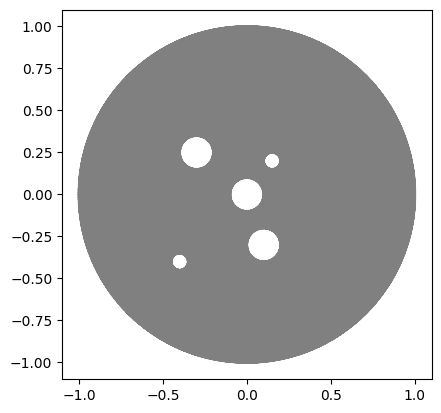

In [25]:
plot(mesh_init)

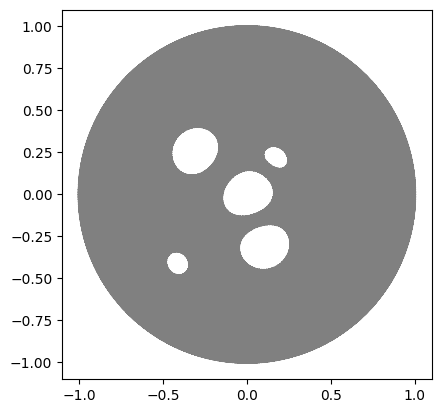

In [18]:
ALE.move(mesh, u2)
plot(mesh)

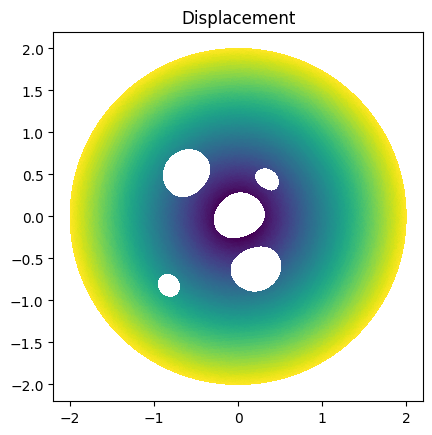

In [19]:
utest = Expression(("x[0]", "x[1]"), degree=2)
utest = interpolate(utest, V)
plot(utest, title='Displacement', mode='displacement')


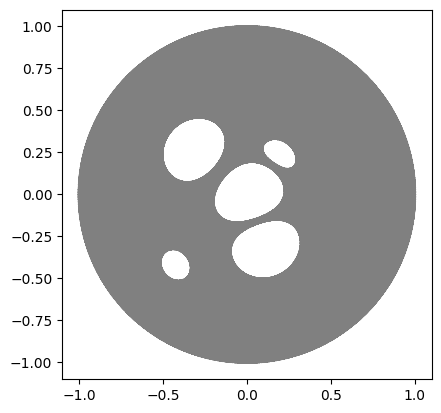

In [20]:
ALE.move(mesh, u2)
plot(mesh)